In [1]:
memory.limit()
memory.size()
gc()

[1] 32698

[1] 47.27

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,510158,27.3,1146638,61.3,621911,33.3
Vcells,941565,7.2,8388608,64.0,1603065,12.3


In [2]:
library(tidyverse, quietly = TRUE)

metrics_df <- read_csv("E:\\work\\results\\grid_search\\metrics.csv")
head(metrics_df)
iou_df <- metrics_df[metrics_df$metric == 'iou', ]
which(! complete.cases(metrics_df))

test_metrics_df <- metrics_df[metrics_df$type == 'test', ]
which(! complete.cases(test_metrics_df))
val_metrics_df <- metrics_df[metrics_df$type == 'val', ]
which(! complete.cases(val_metrics_df))

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  image = col_character(),
  class = col_character(),
  threshold = col_double(),
  metric = col_character(),
  type = col_character(),
  value = col_double(),
  data_dataset = col_character(),
  model_activation = col_character(),
  model_depth = col_double(),
  model_in_channels = col_double(),
  model_out_classes = col_do

image,class,threshold,metric,type,value,data_dataset,model_activation,model_depth,model_in_channels,model_out_classes,model_residual_units,model_width,model_width_ratio,job_hash,epoch,loss,predict_time
bremen_000083_000019,road,0.5,iou,val,0.9390053,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067
bremen_000083_000019,building,0.5,iou,val,0.7033169,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067
bremen_000083_000019,fence,0.5,iou,val,0.1635501,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067
bremen_000083_000019,pole,0.5,iou,val,0.4379638,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067
bremen_000083_000019,traffic light,0.5,iou,val,0.5316917,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067
bremen_000083_000019,traffic sign,0.5,iou,val,0.2888259,cityscapes,piecewise_linear,8,3,19,2,50,1.4,025cb7327dfa11ba27fd6fafcec81e13,237,0.32667,997.2067


integer(0)

integer(0)

integer(0)

**Test Dataset**

integer(0)

                 Df Sum Sq Mean Sq F value Pr(>F)    
job_hash        143   3503  24.496     281 <2e-16 ***
Residuals   2628144 229108   0.087                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 2356

[1] 7940

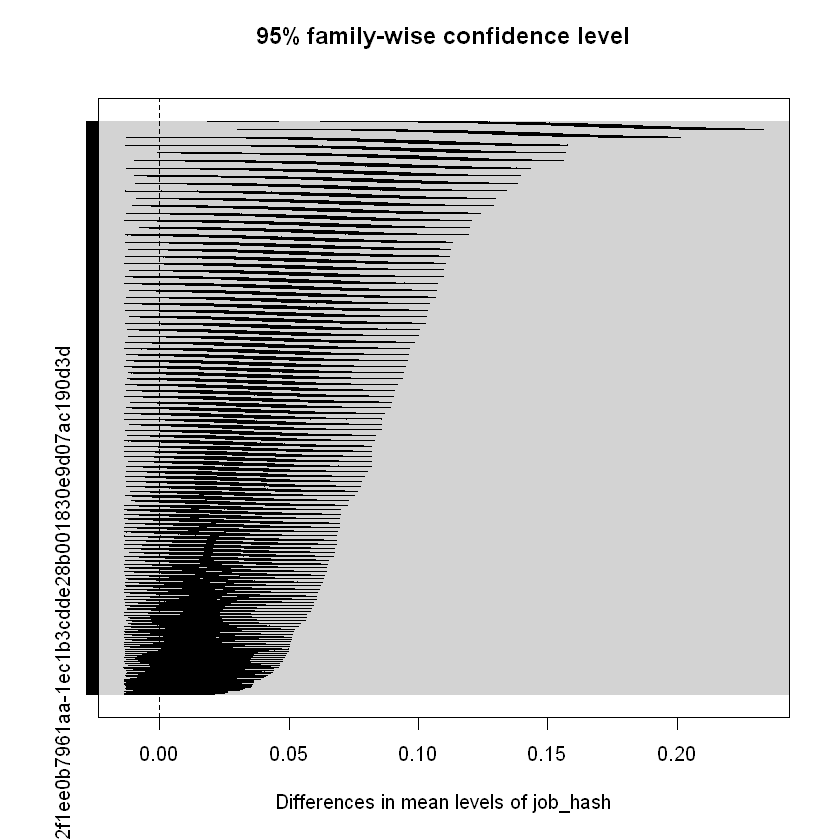

In [3]:
which(! complete.cases(test_metrics_df))
model <- aov(value~job_hash, data=test_metrics_df)
summary(model)
tukey <- TukeyHSD(model, conf.level=.95, ordered=TRUE)
plot(tukey)
results <- as.data.frame(tukey$job_hash)
names(results) <- c("diff", "lwr", "upr", "p_adj")
results <- results[order(results$diff, decreasing=TRUE), ] 
write.csv(results,"E:\\work\\results\\grid_search\\test_tukey.csv", row.names = TRUE)
length( which( results$p_adj > 0.05 ) )
length( which( results$p_adj < 0.05 ) )

**Val Dataset**

                 Df Sum Sq Mean Sq F value Pr(>F)    
job_hash        143   2014  14.087   157.7 <2e-16 ***
Residuals   1495008 133542   0.089                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 3154

[1] 7142

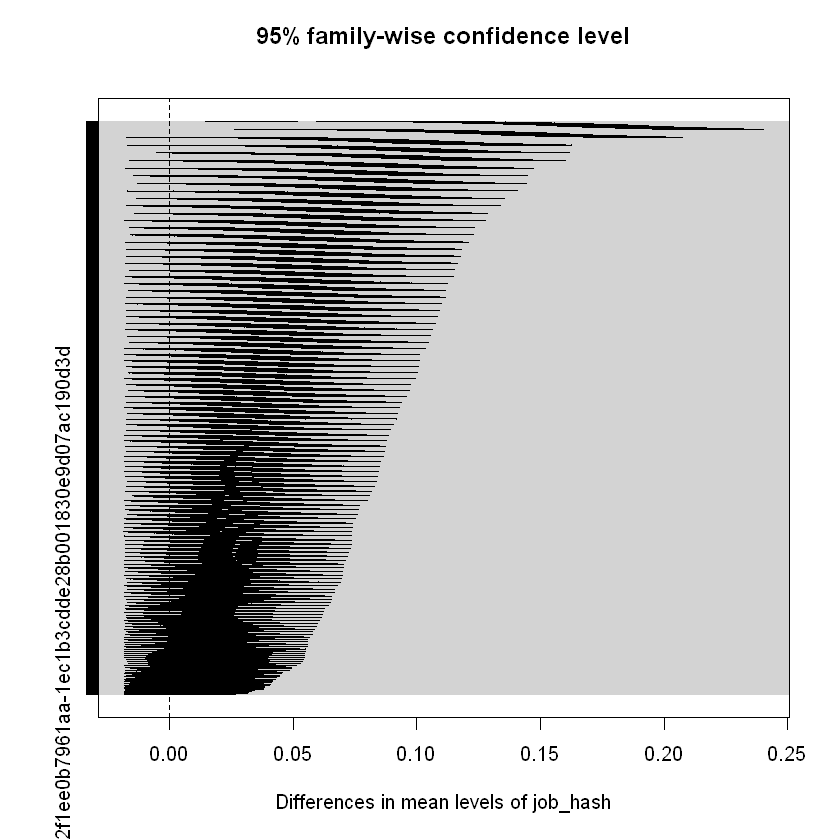

In [4]:
model <- aov(value~job_hash, data=val_metrics_df)
summary(model)
tukey <- TukeyHSD(model, conf.level=.95, ordered=TRUE)
plot(tukey)
results <- as.data.frame(tukey$job_hash)
names(results) <- c("diff", "lwr", "upr", "p_adj")
results <- results[order(results$diff, decreasing=TRUE), ] 
write.csv(results,"E:\\work\\results\\grid_search\\val_tukey.csv", row.names = TRUE)
length( which( results$p_adj > 0.05 ) )
length( which( results$p_adj < 0.05 ) )